# Problem Statement:
        
In this project, initially you need to preprocess the data and then develop an understanding of different features of the data by performing exploratory analysis and creating visualizations.Further, after having sufficient knowledge about the attributes you will perform a predictive task of classification to predict whether an individual makes over 50K a year or less,by using different Machine Learning Algorithms. 


In [329]:
import pandas as pd
import numpy as np

In [330]:
df = pd.read_csv('census-income.csv', skipinitialspace=True)

In [331]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Preprocessing:

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Unnamed: 14     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [333]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [334]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Unnamed: 14       0
dtype: int64

# Data Manipulation

a) Extract the “education” column and store it in “census_ed” .


In [335]:
census_ed = df['education']

In [336]:
census_ed

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32561, dtype: object

b) Extract all the columns from “age” to “relationship” and store it in “census_seq”.

In [337]:
census_seq = df.iloc[:,0:8]

In [338]:
census_seq.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife


c) Extract the column number “5”, “8”, “11” and store it in “census_col”.

In [339]:
census_col = df.iloc[:,[4,7,10]]

In [340]:
census_col.head()

,education-num,relationship,capital-gain
0,13,Not-in-family,2174
1,13,Husband,0
2,9,Not-in-family,0
3,7,Husband,0
4,13,Wife,0


d) Extract all the male employees who work in state-gov and store it in “male_gov”.

In [341]:
male_gov = df[(df.workclass == 'State-gov') & (df.sex == 'Male')]

In [342]:
male_gov.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
123,29,State-gov,267989,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K


e) Extract all the 39 year olds who either have a bachelor's degree or who are native of the United States and store the result in “census_us”.

In [343]:
census_us = df[(df.age == 39) & ((df.education == 'Bachelors') | (df['native-country'] == 'United States'))]

In [344]:
census_us.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
848,39,Private,138192,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
915,39,Private,202027,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,45,United-States,>50K
999,39,Self-emp-inc,329980,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
1336,39,Private,174938,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [345]:
census_us.count()

age               167
workclass         167
fnlwgt            167
education         167
education-num     167
marital-status    167
occupation        167
relationship      167
race              167
sex               167
capital-gain      167
capital-loss      167
hours-per-week    167
native-country    167
Unnamed: 14       167
dtype: int64

f) Extract 200 random rows from the “census” data frame and store it in “census_200”.

In [346]:
census_200 = df.sample(200)

In [347]:
census_200.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
20799,40,Private,96509,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,>50K
20866,27,Private,213152,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K
22387,22,?,224238,Some-college,10,Never-married,?,Own-child,White,Male,0,0,2,United-States,<=50K
26487,46,Private,59287,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
19921,54,Private,156003,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


g) Get the count of different levels of the “workclass” column.

In [348]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

h) Calculate the mean of the “capital.gain” column grouped according to “workclass”.

In [349]:
df.groupby(['workclass'])['capital-gain'].mean()

workclass
?                    606.795752
Federal-gov          833.232292
Local-gov            880.202580
Never-worked           0.000000
Private              889.217792
Self-emp-inc        4875.693548
Self-emp-not-inc    1886.061787
State-gov            701.699538
Without-pay          487.857143
Name: capital-gain, dtype: float64

i) Create a separate dataframe with the details of males and females from the census data that has income more than 50,000. 

In [350]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [351]:
df['Unnamed: 14']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: Unnamed: 14, Length: 32561, dtype: object

In [352]:
df.rename(columns={'Unnamed: 14':'income'}, inplace=True)

In [353]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [354]:
df['income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: income, Length: 32561, dtype: object

In [355]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [356]:
males_more50k = df[(df['sex']=='Male') & (df['income']=='>50K')]

In [357]:
males_more50k.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


In [358]:
females_more50k = df[(df['sex']=='Female') & (df['income']=='>50K')]

In [359]:
females_more50k.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
67,53,Private,169846,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K


j) Calculate the percentage of people from the United States who are private employees and earn less than 50,000 annually. 


In [360]:
us_less50k=df[(df['native-country']=='United-States') & (df['workclass']=='Private') &(df['income']=='<=50K')]

In [361]:
us_less50k.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K


In [362]:
p_us = (len(us_less50k)/len(df))*100

In [363]:
p_us

47.891649519363654

k) Calculate the percentage of married people in the census data.

In [364]:
df['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [365]:
total_married = 0
for i in df.index:
    if ((df['marital-status'][i] == 'Married-civ-spouse') | (df['marital-status'][i] == 'Married-spouse-absent') | (df['marital-status'][i] == 'Married-AF-spouse')):
        total_married+=1

p_married = (total_married/len(df))*100
p_married

47.34805442093302

l) Calculate the percentage of high school graduates earning more than 50,000 annually. 


In [366]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [367]:
hs_more50k = len(df[(df['education']=='HS-grad') &(df['income']=='>50K')])

percentage_hs_more50k=(hs_more50k/len(df))*100

percentage_hs_more50k

5.144190903227788

# Linear Regression:


1. Divide the dataset into training and test sets in 70:30 ratio.
2. Build a linear model on the test set where the dependent variable is “hours.per.week” and the independent variable is “education.num”.
3. Predict the values on the train set and find the error in prediction. 
4. Find the root-mean-square error (RMSE).


In [368]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [369]:
x1 = df[['education-num']]
y1 = df['hours-per-week']

In [370]:
x_train,x_test, y_train, y_test=train_test_split(x1,y1,train_size=0.70, random_state=1)

In [371]:
lr = LinearRegression()

In [372]:
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)

In [373]:
print('Root Mean Square Error: ', np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Square Error:  12.130647896408568


# Logistic Regression

1. Divide the dataset into training and test sets in 65:35 ratio.
2. Build a logistic regression model where the dependent variable is “X”(yearly income) and the independent variable is “occupation”.
3. Predict the values on the test set.
4. Build a confusion matrix and find the accuracy.


In [374]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [375]:
df['occupation']

0             Adm-clerical
1          Exec-managerial
2        Handlers-cleaners
3        Handlers-cleaners
4           Prof-specialty
               ...        
32556         Tech-support
32557    Machine-op-inspct
32558         Adm-clerical
32559         Adm-clerical
32560      Exec-managerial
Name: occupation, Length: 32561, dtype: object

In [376]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [377]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [378]:
y2 = df['income'].replace('<=50K',0).replace('>50K',1)

In [379]:
y2.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [380]:
a = df['occupation'].replace('?','Prof-specialty')

In [381]:
le = LabelEncoder()
a = le.fit_transform(a)

In [382]:
x2 = pd.DataFrame(a)

In [383]:
x2.head()

,0
0,0
1,3
2,5
3,5
4,9


In [384]:
x2.value_counts()

9     5983
2     4099
3     4066
0     3770
11    3650
7     3295
6     2002
13    1597
5     1370
4      994
12     928
10     649
8      149
1        9
dtype: int64

In [385]:
x_train,x_test, y_train, y_test = train_test_split(x2,y2,train_size=0.65, random_state=1)
logreg = LogisticRegression(max_iter=100)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [386]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.7721330174607353


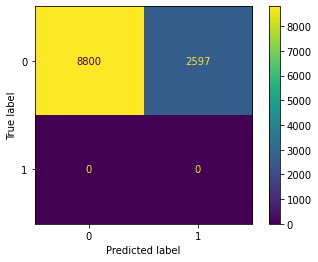

In [387]:
logreg_cm = confusion_matrix(y_pred,y_test)
logreg_cm_d = ConfusionMatrixDisplay(logreg_cm)
logreg_cm_d.plot()

b)Build a multiple logistic regression model as follows:
1. Divide the dataset into training and test sets in 80:20 ratio.
2. Build a logistic regression model where the dependent variable is “X”(yearly income) and independent variables are “age”, “workclass”, and “education”.
3. Predict the values on the test set.
4. Build a confusion matrix and find the accuracy.


In [388]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [389]:
x3 = df[['age','workclass','education']]

In [390]:
x3.head()

,age,workclass,education
0,39,State-gov,Bachelors
1,50,Self-emp-not-inc,Bachelors
2,38,Private,HS-grad
3,53,Private,11th
4,28,Private,Bachelors


In [391]:
x3[['workclass']].value_counts()

workclass       
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
dtype: int64

In [392]:
x3['workclass'] = x3['workclass'].replace('?','Private')

C:\Users\Gaunik\AppData\Local\Temp\ipykernel_19880\361826439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x3['workclass'] = x3['workclass'].replace('?','Private')


In [393]:
x3['workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [394]:
x3 = x3.apply(le.fit_transform)

In [395]:
x3.head()

,age,workclass,education
0,22,6,9
1,33,5,9
2,21,3,11
3,36,3,1
4,11,3,9


In [396]:
y3 = df['income'].replace('<=50K',0).replace('>50K',1)
y3.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [397]:
x_train,x_test, y_train, y_test = train_test_split(x3,y3,train_size=0.8, random_state=1)
logreg = LogisticRegression(max_iter=100)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [398]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.756947643175188


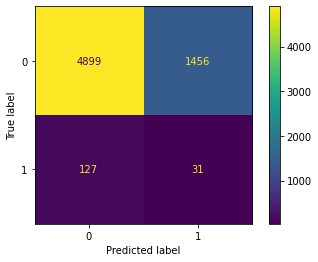

In [399]:
logreg_cm = confusion_matrix(y_pred,y_test)
logreg_cm_d = ConfusionMatrixDisplay(logreg_cm)
logreg_cm_d.plot()

# Decision Tree

a) Build a decision tree model as follows:

1. Divide the dataset into training and test sets in 70:30 ratio.
2. Build a decision tree model where the dependent variable is “X”(Yearly Income) and the rest of the variables as independent variables.
3. Predict the values on the test set.
4. Build a confusion matrix and calculate the accuracy.


In [400]:
from sklearn.tree import DecisionTreeClassifier

In [401]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [402]:
df['workclass'] = df['workclass'].replace('?','Private')

In [403]:
df['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [404]:
df['fnlwgt'].value_counts()

164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

In [405]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [406]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [407]:
df['occupation']=df['occupation'].replace('?','Prof-specialty')

In [408]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [409]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [410]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [411]:
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [412]:
df['native-country'] = df['native-country'].replace('?','United-States')

In [413]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [414]:
df = df.apply(le.fit_transform)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,6,2671,9,12,4,0,1,4,1,25,0,39,38,0
1,33,5,2926,9,12,2,3,0,4,1,0,0,12,38,0
2,21,3,14086,11,8,0,5,1,4,1,0,0,39,38,0
3,36,3,15336,1,6,2,5,0,2,1,0,0,39,38,0
4,11,3,19355,9,12,2,9,5,2,0,0,0,39,4,0


In [415]:
x4 = df.iloc[:,:-1]

In [416]:
x4.shape

(32561, 14)

In [417]:
y4 = df.iloc[:,-1]

In [418]:
y4.shape

(32561,)

In [419]:
y4.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [420]:
x_train,x_test, y_train, y_test = train_test_split(x4,y4,train_size=0.7, random_state=1)

In [421]:
x_train.shape

(22792, 14)

In [422]:
x_test.shape

(9769, 14)

In [423]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [424]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.8127751049237384


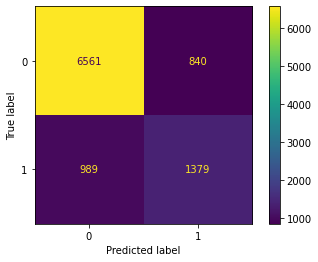

In [425]:
dt_cm = confusion_matrix(y_pred,y_test)
dt_cm_d = ConfusionMatrixDisplay(dt_cm)
dt_cm_d.plot()

# Random Forest

a) Build a random forest model as follows:
1. Divide the dataset into training and test sets in 80:20 ratio.
2. Build a random forest model where the dependent variable is “X”(Yearly Income) and the rest of the variables as independent variables and number of trees as 300.
3. Predict values on the test set
4. Build a confusion matrix and calculate the accuracy


In [426]:
from sklearn.ensemble import RandomForestClassifier

In [427]:
x_train,x_test,y_train,y_test=train_test_split(x4,y4,train_size=0.8,random_state=1)

In [428]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [429]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.8610471364962383


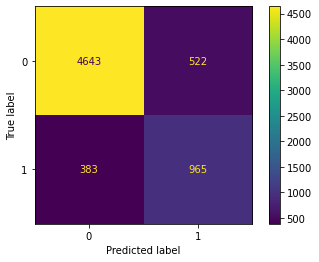

In [430]:
rfc_cm = confusion_matrix(y_pred,y_test)
rfc_cm_d = ConfusionMatrixDisplay(rfc_cm)
rfc_cm_d.plot()

# For this problem, use the population dataset, and perform the following:

In [431]:
dfp = pd.read_csv('popdata.csv', parse_dates = True, index_col='date')

In [432]:
dfp.shape

(816, 1)

In [433]:
dfp = dfp.dropna()

In [434]:
dfp.shape

(816, 1)

In [435]:
dfp.head()

,value
date,
1952-01-01,127299.0
1952-02-01,127517.0
1952-03-01,127721.0
1952-04-01,127933.0
1952-05-01,128130.0


1. EDA on the time series to find trends and seasonality.
2. Forecast the population on the given dataset for the next 6 months. 

In [436]:
import matplotlib.pyplot as plt
#from datetime import datetime

In [437]:
dfp.isnull().sum()

value    0
dtype: int64

<AxesSubplot:xlabel='date'>

<Figure size 720x360 with 0 Axes>

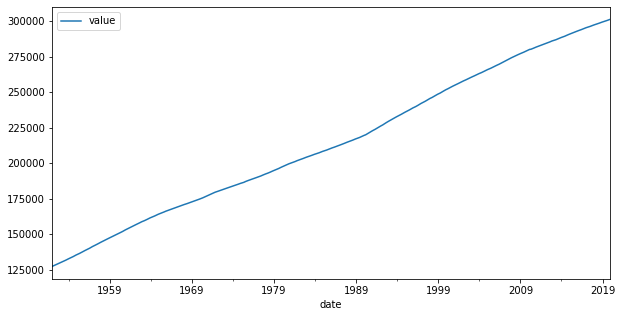

In [438]:
plt.figure(figsize=(10,5))
dfp.plot(figsize=(10,5))

Rolling mean and Rolling Standard Deviation

In [439]:
rollmean=dfp.rolling(window=12).mean()
print(rollmean.head(30))
rollstd=dfp.rolling(window=12).std()
print(rollstd.head(30))

                    value
date                     
1952-01-01            NaN
1952-02-01            NaN
1952-03-01            NaN
1952-04-01            NaN
1952-05-01            NaN
1952-06-01            NaN
1952-07-01            NaN
1952-08-01            NaN
1952-09-01            NaN
1952-10-01            NaN
1952-11-01            NaN
1952-12-01  128482.583333
1953-01-01  128704.583333
1953-02-01  128924.833333
1953-03-01  129143.000000
1953-04-01  129360.750000
1953-05-01  129577.833333
1953-06-01  129795.583333
1953-07-01  130014.833333
1953-08-01  130235.750000
1953-09-01  130457.833333
1953-10-01  130680.500000
1953-11-01  130911.500000
1953-12-01  131136.166667
1954-01-01  131362.583333
1954-02-01  131591.083333
1954-03-01  131822.333333
1954-04-01  132055.166667
1954-05-01  132290.083333
1954-06-01  132526.250000
                 value
date                  
1952-01-01         NaN
1952-02-01         NaN
1952-03-01         NaN
1952-04-01         NaN
1952-05-01         NaN
1952-06

Plotting the Actual and Rolling Sample Means, to check if they are equal or not.

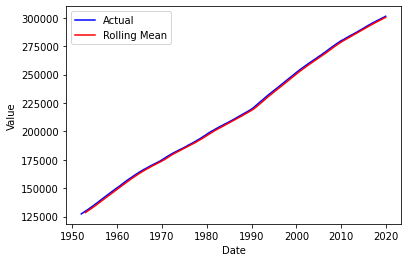

In [440]:
actualval=plt.plot(dfp,color='blue',label='Actual')
rm_val=plt.plot(rollmean,color='red',label='Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


As we can see that Rolling Mean is almost equal to the actual values.

In [441]:
dfp.head()

,value
date,
1952-01-01,127299.0
1952-02-01,127517.0
1952-03-01,127721.0
1952-04-01,127933.0
1952-05-01,128130.0


For the time series to be stationary, the p-value should be less than 0.05.
To get the p-value, we apply Augmented Dickey Fuller test.

In [442]:
from statsmodels.tsa.stattools import adfuller

In [443]:
def adf_test(dataset):
    dftest=adfuller(dataset, autolag='AIC')
    print("1. ADF:", dftest[0])
    print("2. p-value:", dftest[1])
    print("3. Num of lags:", dftest[2])
    print ("4.Number of observations used for ADF regression and critical value calculation:", dftest[3])
    print("5. Critical values: ")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)

In [444]:
adf_test(dfp)

1. ADF: -0.66531741094738
2. p-value: 0.855529777911008
3. Num of lags: 17
4.Number of observations used for ADF regression and critical value calculation: 798
5. Critical values: 
	 1% :  -3.4385711275998583
	 5% :  -2.8651686574447375
	 10% :  -2.568702230639255


Since the p-value is not < 0.05, we fail to reject null hypothesis.
Now we have to make the data stationary.

we have 2 methods to make the data stationary,
1. Logarithmic Method
2. Differential Method

Log Method

In [445]:
dfp_log=np.log(dfp)

In [446]:
rm_log = dfp_log.rolling(window=12).mean()


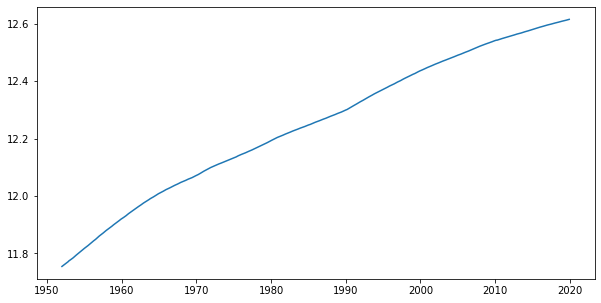

In [447]:
plt.figure(figsize=(10,5))
plt.plot(dfp_log)

In [448]:
adf_test(dfp_log)

1. ADF: -2.0920193871286874
2. p-value: 0.24773573149032668
3. Num of lags: 17
4.Number of observations used for ADF regression and critical value calculation: 798
5. Critical values: 
	 1% :  -3.4385711275998583
	 5% :  -2.8651686574447375
	 10% :  -2.568702230639255


As we can see, p-value is still not < 0.05, so data is not stationary.

So we move on to the 2nd method, i.e. Differencing

In [449]:
diff_dfp_log = dfp_log-rm_log

In [450]:
diff_dfp_log

,value
date,
1952-01-01,NaN
1952-02-01,NaN
1952-03-01,NaN
1952-04-01,NaN
1952-05-01,NaN
...,...
2019-08-01,0.003019
2019-09-01,0.003113
2019-10-01,0.003212


In [451]:
rm_diff = diff_dfp_log.rolling(window=12).mean()

In [452]:
diff_dfp_log=diff_dfp_log.dropna()
diff_dfp_log

,value
date,
1952-12-01,0.009811
1953-01-01,0.009748
1953-02-01,0.009553
1953-03-01,0.009237
1953-04-01,0.009139
...,...
2019-08-01,0.003019
2019-09-01,0.003113
2019-10-01,0.003212


In [453]:
adf_test(diff_dfp_log)

1. ADF: -1.8737421840972248
2. p-value: 0.3445126240756924
3. Num of lags: 17
4.Number of observations used for ADF regression and critical value calculation: 787
5. Critical values: 
	 1% :  -3.438686413400388
	 5% :  -2.8652194721349424
	 10% :  -2.5687293001910008


p-value is not less than 0.05, so we will once more use the differencial method.

In [454]:
diff2_dfp_log = diff_dfp_log - rm_diff

In [455]:
diff2_dfp_log = diff2_dfp_log.dropna()

In [456]:
diff2_dfp_log.head()

,value
date,
1953-11-01,0.000525
1953-12-01,0.000539
1954-01-01,0.000581
1954-02-01,0.000484
1954-03-01,0.000278


In [457]:
diff2_log_rm=diff2_dfp_log.rolling(window=12).mean()

In [458]:
adf_test(diff2_dfp_log)

1. ADF: -4.201286686441874
2. p-value: 0.0006556035314592563
3. Num of lags: 18
4.Number of observations used for ADF regression and critical value calculation: 775
5. Critical values: 
	 1% :  -3.4388159246521433
	 5% :  -2.865276554696385
	 10% :  -2.5687597090530696


As we can see the data is stationary as p-value (0.00065) is less than 0.05.

Now we can calculate the values of p, q, d.
(d=2)

# Values of p,d,q

In [459]:
from pmdarima.arima import auto_arima

--finding the best p ,d , q

In [460]:
diff2_dfp_log.head()

,value
date,
1953-11-01,0.000525
1953-12-01,0.000539
1954-01-01,0.000581
1954-02-01,0.000484
1954-03-01,0.000278


In [461]:
stepwise_fitting=auto_arima(diff2_dfp_log["value"],trace=True)
stepwise_fitting.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-12786.116, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-10584.772, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-11991.424, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-10582.769, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-10571.375, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-12391.892, Time=0.61 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-12749.814, Time=0.21 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-12840.917, Time=0.32 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-12758.318, Time=0.72 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-10572.262, Time=0.75 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-10572.257, Time=1.15 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-12763.998, Time=0.39 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-12740.939, Time=0.40 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-12832.099, Time=0.49 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  794
Model:               SARIMAX(3, 0, 4)   Log Likelihood                6485.629
Date:                Fri, 13 May 2022   AIC                         -12953.259
Time:                        13:31:40   BIC                         -12911.165
Sample:                             0   HQIC                        -12937.083
                                - 794                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.695e-06   1.17e-06     -3.150      0.002      -6e-06    -1.4e-06
ar.L1          2.5543      0.003   1020.358      0.000       2.549       2.559
ar.L2         -2.4210      0.001  -2932.647      0.000      -2.423      -2.419
ar.L3          0.8290      0.002    369.625      0.000       0.825       0.833
ma.L1         -1.1465      0.000  -3861.429      0.000      -1.147      -1.146
ma.L2          0.4657      0.000   1745.431      0.000       0.465       0.466
ma.L3          0.0372      0.000    163.773      0.000       0.037       0.038
ma.L4          0.0807      0.000    515.923      0.000       0.080       0.081
sigma2      4.971e-09   1.05e-10     47.175      0.000    4.76e-09    5.18e-09
===================================================================================
Ljung-Box (L1) (Q):                   3.52   Jarque-Bera (JB):              6014.03
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.52e+18. Standard errors may be unstable.
"""

# Test and Train Data

In [462]:
from statsmodels.tsa.arima_model import ARIMA

In [463]:
dfp.head()

,value
date,
1952-01-01,127299.0
1952-02-01,127517.0
1952-03-01,127721.0
1952-04-01,127933.0
1952-05-01,128130.0


In [464]:
dfp.shape

(816, 1)

In [465]:
train_data = diff2_dfp_log[0:635]
test_data = diff2_dfp_log[635:]
train_data.head()

,value
date,
1953-11-01,0.000525
1953-12-01,0.000539
1954-01-01,0.000581
1954-02-01,0.000484
1954-03-01,0.000278


In [466]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train_data, order = (3,2,4))
arima_fit = model.fit()         

c:\Users\Gaunik\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Gaunik\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Gaunik\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Gaunik\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Gaunik\AppData\Loca

In [467]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred=arima_fit.predict(start = start, end = end)

In [468]:
pred

2006-10-01    0.000466
2006-11-01    0.000782
2006-12-01    0.001149
2007-01-01    0.001577
2007-02-01    0.002064
                ...   
2019-08-01    0.265613
2019-09-01    0.267652
2019-10-01    0.269692
2019-11-01    0.271732
2019-12-01    0.273772
Freq: MS, Name: predicted_mean, Length: 159, dtype: float64

<AxesSubplot:>

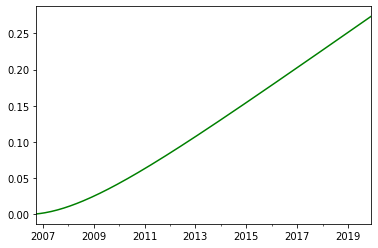

In [475]:
pred.plot(color = 'green')

In [470]:
print(arima_fit.aic)

-9263.850090025513


In [471]:
from sklearn.metrics import mean_squared_error

In [472]:
print('RMSE: ',np.sqrt(mean_squared_error(test_data,pred)))

RMSE:  0.14730461313404655
